# Brain Tumor Classification (MRI)

**Definition:** A brain tumor is an abnormal growth of brain cells, whether in the brain tissue itself or in surrounding tissues such as the meninges or nerves associated with the brain. These tumors can be benign (non-cancerous) or malignant (cancerous).

**Severity:** The severity of a tumor depends on its size, location, and rate of growth. Since the brain is the control center for the entire body, any pressure or damage to a specific part of the brain can cause major problems in vital body functions such as movement, sensation, vision, and memory. Cancerous tumors are more dangerous because they grow quickly and spread to other areas of the brain or body.

**Types:**

**Glioma:**

This is a type of tumor that affects brain cells called "glial cells", which are responsible for supporting and protecting nerve cells. Glioma usually appears in the brain or spine.
On MRI: You will find an irregular area or spot in the brain that is darker or lighter than the rest of the areas.
**Meningioma:**

This is a tumor that appears in the membranes that cover the brain and spinal cord (meninges). This tumor is usually benign and does not cause many problems unless it is large.
On MRI: You may see an oval or round area around the brain that is separate from the brain tissue itself.

**Pituitary Tumor:**

This is a tumor that occurs in the pituitary gland, which is a small gland at the base of the brain that controls the body's hormones.
On MRI: You will see the pituitary gland larger than normal or you may find small lumps around the gland.

In [1]:
# General Imports
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Building Model
from keras.utils import plot_model
from tensorflow.keras import models
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import legacy


# Training Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

# Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Data Processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import load_img

## Importing Data

In [2]:
classes=[]
filename='/Users/lunatic/Downloads/programming/prjs/IDP-BrainTumorImageClassification/multiclass_data'
for sub_folder in os.listdir(os.path.join(filename,'Training')):
    classes.append(sub_folder)
print(classes)

['pituitary', 'notumor', 'glioma', 'meningioma']


In [3]:
train_path='/Users/lunatic/Downloads/programming/prjs/IDP-BrainTumorImageClassification/multiclass_data/Training/'
test_path='/Users/lunatic/Downloads/programming/prjs/IDP-BrainTumorImageClassification/multiclass_data/Testing/'

In [4]:
img_list=[]
label_list=[]
for label in classes:
    for img_file in os.listdir(train_path+label):
        img_list.append(train_path+label+'/'+img_file)
        label_list.append(label)

In [5]:
train_data = pd.DataFrame({'Image':img_list,'Label':label_list})
train_data

,Image,Label
0,/Users/lunatic/Downloads/programming/prjs/IDP-...,pituitary
1,/Users/lunatic/Downloads/programming/prjs/IDP-...,pituitary
2,/Users/lunatic/Downloads/programming/prjs/IDP-...,pituitary
3,/Users/lunatic/Downloads/programming/prjs/IDP-...,pituitary
4,/Users/lunatic/Downloads/programming/prjs/IDP-...,pituitary
...,...,...
5707,/Users/lunatic/Downloads/programming/prjs/IDP-...,meningioma
5708,/Users/lunatic/Downloads/programming/prjs/IDP-...,meningioma
5709,/Users/lunatic/Downloads/programming/prjs/IDP-...,meningioma
5710,/Users/lunatic/Downloads/programming/prjs/IDP-...,meningioma


In [6]:
img_list=[]
label_list=[]
for label in classes:
    for img_file in os.listdir(test_path+label):
        img_list.append(test_path+label+'/'+img_file)
        label_list.append(label)

In [7]:
test_data = pd.DataFrame({'Image':img_list,'Label':label_list})
test_data

,Image,Label
0,/Users/lunatic/Downloads/programming/prjs/IDP-...,pituitary
1,/Users/lunatic/Downloads/programming/prjs/IDP-...,pituitary
2,/Users/lunatic/Downloads/programming/prjs/IDP-...,pituitary
3,/Users/lunatic/Downloads/programming/prjs/IDP-...,pituitary
4,/Users/lunatic/Downloads/programming/prjs/IDP-...,pituitary
...,...,...
1306,/Users/lunatic/Downloads/programming/prjs/IDP-...,meningioma
1307,/Users/lunatic/Downloads/programming/prjs/IDP-...,meningioma
1308,/Users/lunatic/Downloads/programming/prjs/IDP-...,meningioma
1309,/Users/lunatic/Downloads/programming/prjs/IDP-...,meningioma


## Data Visualization

In [8]:
def Plot_Classes(BASE_URL, Rows=2, Columns=5):


  plt.figure(figsize = (25, 8))

  image_count = 1

  for directory in os.listdir(BASE_URL):

      if directory[0] != '.':

          Max_Random = len(os.listdir(os.path.join(BASE_URL,directory)))

          Random_Number = np.random.randint(0, Max_Random)

          for i, file in enumerate(os.listdir(BASE_URL + directory)):

              if i == Random_Number:

                  fig = plt.subplot(Rows, Columns, image_count)
                  image_count += 1

                  image = plt.imread(BASE_URL + directory + '/' + file)
                  plt.imshow(image)

                  plt.title(directory)

                  break

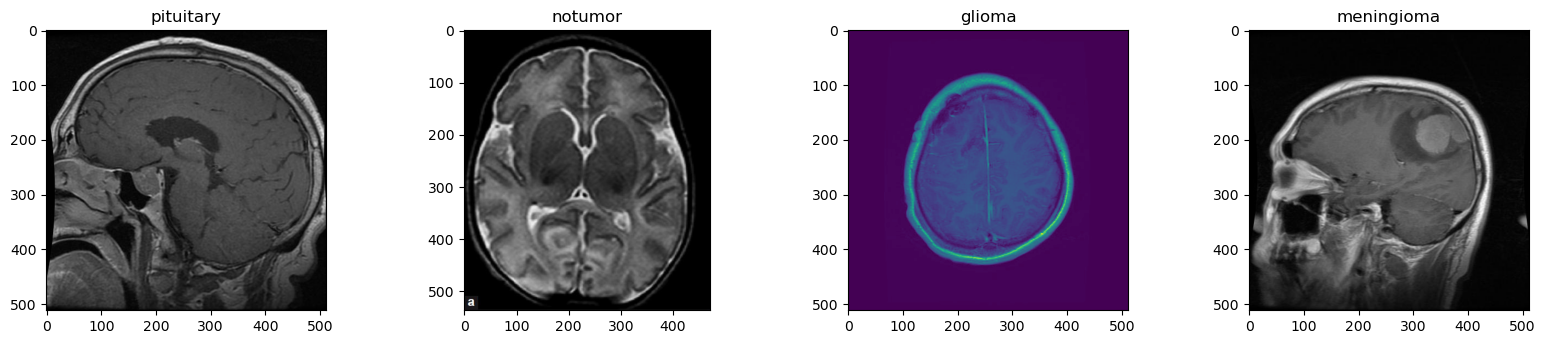

In [9]:
Plot_Classes(train_path)

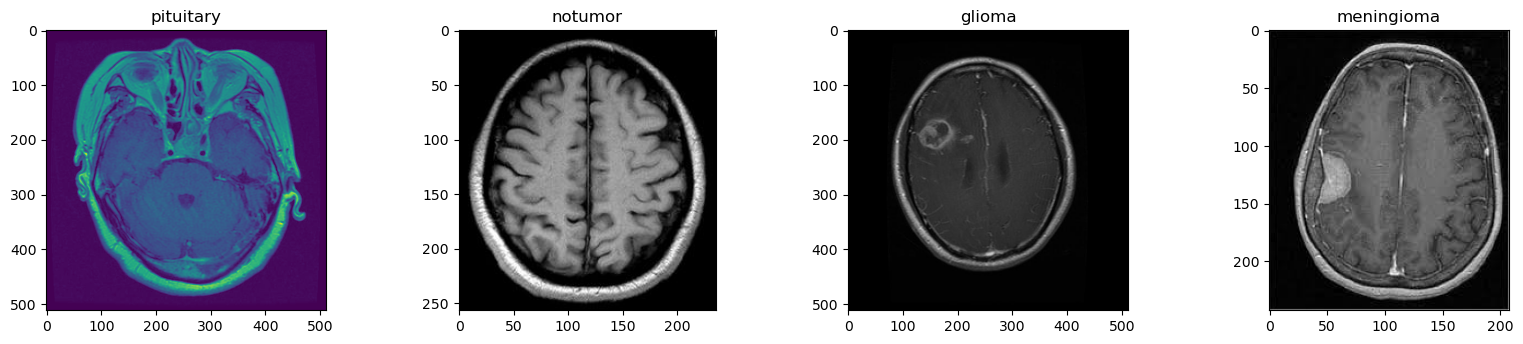

In [10]:
Plot_Classes(test_path)

In [11]:
train_data['Label'].value_counts()

Label
notumor       1595
pituitary     1457
meningioma    1339
glioma        1321
Name: count, dtype: int64

In [12]:
px.histogram(train_data, y="Label", color="Label", title="Classes Distribution")

In [13]:
test_data['Label'].value_counts()

Label
notumor       405
meningioma    306
pituitary     300
glioma        300
Name: count, dtype: int64

In [14]:
px.histogram(test_data, y="Label", color="Label", title="Classes Distribution")

## Data Preprocessing

In [15]:
# Image size
image_size = (150, 150)

# Training batch size
batch_size = 32

In [16]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.15, 
                                   rotation_range=10,
                                   brightness_range=(0.85, 1.15),
                                   width_shift_range=0.002,
                                   height_shift_range=0.002,
                                   shear_range=12.5,
                                   zoom_range=0,
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   fill_mode="nearest")

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

# Creating training data generator
train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training',  
                                                    seed=0)

# Creating validation data generator
val_generator = val_datagen.flow_from_directory(train_path,
                                                target_size=image_size,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='validation', 
                                                seed=0)

# No augmentation of the test data, just rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# applying the generator to testing data with constant seed
test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=image_size,
                                                  batch_size=batch_size,
                                                  class_mode="categorical",
                                                  shuffle=False,
                                                  seed=0)

Found 4857 images belonging to 4 classes.
Found 855 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [17]:
def show_ImageDataGenerator(ImageDataGenerator, num_samples=5, figsize=(12, 12), save=False):
    """
    Function to viusalize how the ImageDataGenerator augments the data
    """

    # Generate augmented samples
    # Use __next__() instead of next()
    augmented_samples = train_generator.__next__()

    # Extract images from the batch
    images = augmented_samples[0][:num_samples]

    # Display the augmented images
    fig, axes = plt.subplots(1, num_samples, figsize=figsize)

    for i, ax in enumerate(axes):
        ax.imshow(images[i])
        ax.axis('off')

    plt.tight_layout()

    if save:
        plt.savefig('show_ImageDataGenerator.pdf')

    plt.show()

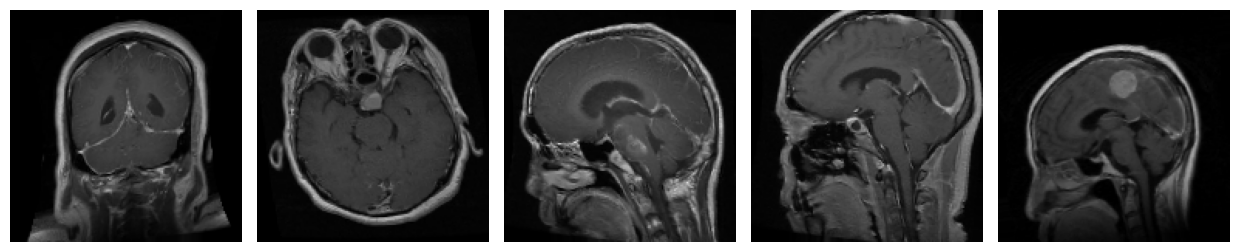

In [18]:
show_ImageDataGenerator(train_datagen, num_samples=5, figsize=(12.5, 8), save=False)

### Training Setup

In [19]:
# Image shape: height, width, RBG
image_shape = (image_size[0], image_size[1], 3)


print(f'Image shape: {image_shape}')
print(f'Batch size: {batch_size}')
print(f'Number of Train batches: {len(train_generator)}')
print(f'Number of Validation batches: {len(val_generator)}')
print(f'Number of Testing batches: {len(test_generator)}')

Image shape: (150, 150, 3)
Batch size: 32
Number of Train batches: 152
Number of Validation batches: 27
Number of Testing batches: 41


In [20]:
Classes_Map = train_generator.class_indices

num_classes = len(Classes_Map)

print("Number of Classes:", num_classes)
Classes_Map

Number of Classes: 4


{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [21]:
def plot_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.figure(figsize=(15,5))
  plt.style.use('ggplot')


  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, 'bo-' , label = "TrainL oss")
  plt.plot(epochs, val_loss, 'o-' , color='orange', label = "Val Loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()


  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, 'bo-' , label = "Train Acc")
  plt.plot(epochs, val_accuracy, 'o-' , color='orange' , label = "Val Acc")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

  plt.style.use('default')

In [22]:
def CM(model, test_generator, categories):
    """
    Function to return the confusion matrix of a given CNN model.
    """
    from sklearn.metrics import confusion_matrix
    # Predictions on test dataset
    predictions = model.predict(test_generator)
    predicted_categories = np.argmax(predictions, axis=1)
    true_categories = test_generator.classes

    # Create a confusion matrix
    confusion_matrix_array = confusion_matrix(true_categories, predicted_categories)
    print(f"Classification Report for {model}:")
    print(classification_report(true_categories, predicted_categories, target_names=categories))

    return confusion_matrix_array


def calculate_metrics(confusion_matrix, categories):
    """
    Function to calculate important metrics for multi-classification problems.
    """
    # Calculating 4 different metrics
    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
    recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
    f1_score = 2 * (precision * recall) / (precision + recall)
    accuracy = np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)

    # Printing the results based on each category
    for i, category in enumerate(categories):
        print(f"Class: {category.title()}")
        print(f"Precision: {precision[i]:.3f}")
        print(f"Recall: {recall[i]:.3f}")
        print(f"F1-Score: {f1_score[i]:.3f}\n")

    # Showing the total accuracy of the model
    print(f"\nAccuracy: {accuracy:.3f}")

## CNN Model

In [23]:
def create_cnn_model(input_shape=image_shape, num_classes=num_classes):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_model = create_cnn_model()
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,454,660 (13.18 MB)

 Trainable params: 3,454,660 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
cnn_history = cnn_model.fit(train_generator,epochs=30,validation_data=val_generator)

Epoch 1/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 49s 320ms/step - accuracy: 0.5049 - loss: 1.0340 - val_accuracy: 0.6924 - val_loss: 0.8023
Epoch 2/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 57s 373ms/step - accuracy: 0.7876 - loss: 0.5400 - val_accuracy: 0.7392 - val_loss: 0.6657
Epoch 3/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 60s 391ms/step - accuracy: 0.8406 - loss: 0.4196 - val_accuracy: 0.8129 - val_loss: 0.5348
Epoch 4/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 62s 410ms/step - accuracy: 0.8605 - loss: 0.3658 - val_accuracy: 0.8234 - val_loss: 0.4319
Epoch 5/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 58s 381ms/step - accuracy: 0.8754 - loss: 0.3238 - val_accuracy: 0.8667 - val_loss: 0.3840
Epoch 6/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 63s 410ms/step - accuracy: 0.9200 - loss: 0.2182 - val_accuracy: 0.8713 - val_loss: 0.3727
Epoch 7/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 62s 405ms/step - accuracy: 0.9252 - loss: 0.1927 - val_accuracy: 0.8398 - val_loss: 0.5082
Epoch 8/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 62s 406ms/step - accuracy: 0.9349 - loss: 0

### CNN Model Evaluation

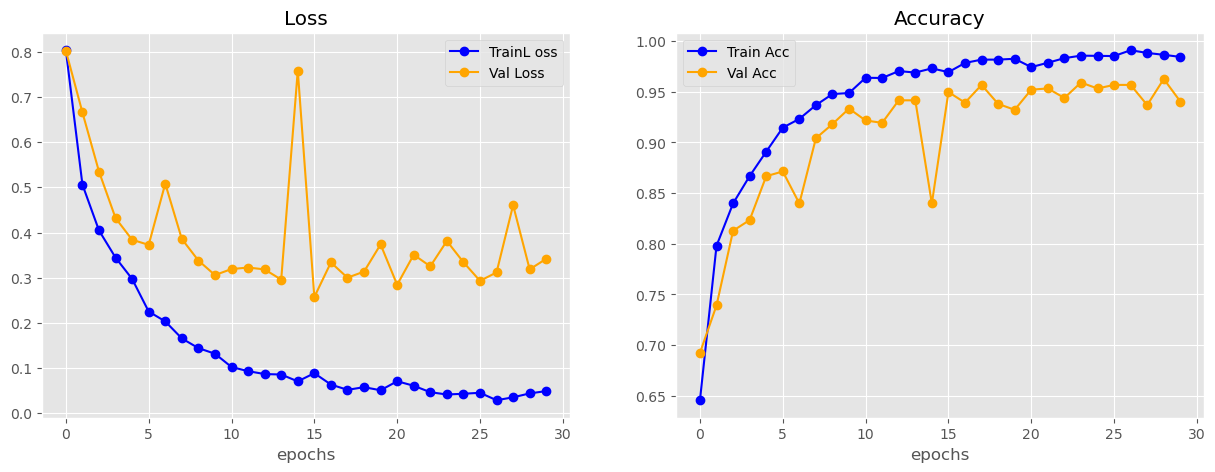

In [25]:
plot_curves(cnn_history)

In [ ]:
loss, accuracy = cnn_model.evaluate(test_generator)
print(f"Test Loss: {loss:0.5f}")
print(f"Test Accuracy: {accuracy:0.5f}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.9467 - loss: 0.2326
Test Loss: 0.14281
Test Accuracy: 0.97178


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step
Classification Report for <Sequential name=sequential, built=True>:
              precision    recall  f1-score   support

   pituitary       1.00      0.93      0.96       300
     notumor       0.93      0.96      0.95       306
      glioma       0.98      0.99      0.99       405
  meningioma       0.97      1.00      0.98       300

    accuracy                           0.97      1311
   macro avg       0.97      0.97      0.97      1311
weighted avg       0.97      0.97      0.97      1311



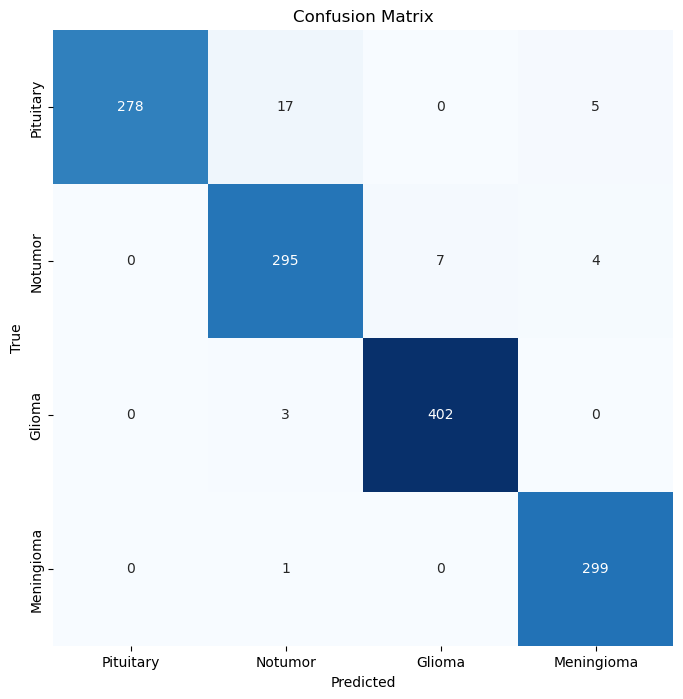

In [27]:
# Plotting confusion matrix
confusion_matrix = CM(model=cnn_model, test_generator=test_generator, categories=classes)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(4) + 0.5,
           labels=[name.title() for name in classes], ha='center')
plt.yticks(ticks=np.arange(4) + 0.5,
           labels=[name.title() for name in classes], va='center')
plt.show()

## VGG16


In [28]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


for layer in base_model_vgg.layers[:-10]:
    layer.trainable = False

for layer in base_model_vgg.layers[-10:]:
    layer.trainable = True

# Add custom classification head
x = base_model_vgg.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)  

model_vgg = Model(inputs=base_model_vgg.input, outputs=output)

model_vgg.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model_vgg.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,979,396 (57.14 MB)

 Trainable params: 13,833,988 (52.77 MB)

 Non-trainable params: 1,145,408 (4.37 MB)

In [29]:
vgg_history = model_vgg.fit(train_generator,epochs=20,validation_data=val_generator)

Epoch 1/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 712s 5s/step - accuracy: 0.6785 - loss: 0.7658 - val_accuracy: 0.8444 - val_loss: 0.4639
Epoch 2/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 799s 5s/step - accuracy: 0.9002 - loss: 0.2647 - val_accuracy: 0.8246 - val_loss: 0.5122
Epoch 3/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 743s 5s/step - accuracy: 0.9347 - loss: 0.1807 - val_accuracy: 0.8772 - val_loss: 0.4077
Epoch 4/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 713s 5s/step - accuracy: 0.9554 - loss: 0.1355 - val_accuracy: 0.9170 - val_loss: 0.2424
Epoch 5/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 2593s 17s/step - accuracy: 0.9715 - loss: 0.0909 - val_accuracy: 0.9228 - val_loss: 0.2281
Epoch 6/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 2350s 10s/step - accuracy: 0.9629 - loss: 0.0983 - val_accuracy: 0.8281 - val_loss: 0.7275
Epoch 7/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 2494s 16s/step - accuracy: 0.9641 - loss: 0.1256 - val_accuracy: 0.9380 - val_loss: 0.2733
Epoch 8/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 10607s 70s/step - accuracy: 0.9818 - loss: 0.0591 -

KeyboardInterrupt: 

In [ ]:
plot_curves(vgg_history)

In [ ]:
loss, accuracy = model_vgg.evaluate(test_generator)
print(f"Test Loss: {loss:0.5f}")
print(f"Test Accuracy: {accuracy:0.5f}")

In [ ]:
# Plotting confusion matrix
confusion_matrix = CM(model=model_vgg, test_generator=test_generator, categories=classes)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(4) + 0.5,
           labels=[name.title() for name in classes], ha='center')
plt.yticks(ticks=np.arange(4) + 0.5,
           labels=[name.title() for name in classes], va='center')
plt.show()

Note: they would also give similar performance so it might be redunsant working o them if this performace if sattisfied given the agumentations and preprocessing